### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
df=pd.read_csv('Life_Expectancy.csv',index_col=0)
df.head()

,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Country,,,,,,,,,,,,,,,,,
Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Status              124 non-null    object 
 1   Adult_Mortality     124 non-null    int64  
 2   Infant_Deaths       124 non-null    int64  
 3   Hepatitis           124 non-null    int64  
 4   Measles             124 non-null    int64  
 5    BMI                124 non-null    float64
 6   Underfive_Deaths    124 non-null    int64  
 7   Polio               124 non-null    int64  
 8   Diphtheria          124 non-null    int64  
 9    HIV                124 non-null    float64
 10  GDP                 124 non-null    float64
 11  Population          124 non-null    int64  
 12  Malnourished10_19   124 non-null    float64
 13  Malnourished5_9     124 non-null    float64
 14  Income_Index        124 non-null    float64
 15  Schooling           124 non-null    float64
 16

In [4]:
df.columns=df.columns.str.strip()# since the  variable names got a space in the beginning we use this code
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status             124 non-null    object 
 1   Adult_Mortality    124 non-null    int64  
 2   Infant_Deaths      124 non-null    int64  
 3   Hepatitis          124 non-null    int64  
 4   Measles            124 non-null    int64  
 5   BMI                124 non-null    float64
 6   Underfive_Deaths   124 non-null    int64  
 7   Polio              124 non-null    int64  
 8   Diphtheria         124 non-null    int64  
 9   HIV                124 non-null    float64
 10  GDP                124 non-null    float64
 11  Population         124 non-null    int64  
 12  Malnourished10_19  124 non-null    float64
 13  Malnourished5_9    124 non-null    float64
 14  Income_Index       124 non-null    float64
 15  Schooling          124 non-null    float64
 16  Expected        

<a id="Bivariate"> </a>
## 1. Bivariate Regression

- It is a statistical method used to determine the relationship between target and one dependent variable
- It is represented by the equation y=c+m*x
- where y is the target variable,c is the cost function or y-intercept,m is the coeff of x , and x is the independent variable
- For each unit increase in x, y increases by m

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles',
       'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [6]:
y=df['Expected']
x=df['Adult_Mortality']
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.27e-20
Time:                        19:09:45   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 50.5% of the variation in LIFE EXPECTANCY is explained by ADULT_MORTALITY
- If  ADULT_MORTALITY increases by one unit LIFE EXPECTANCY decreases by -0.0591	

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
y=df['Expected']
x=df['Income_Index']
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()

In [8]:
model.resid

Country
Afghanistan     2.759637
Albania         3.295989
Algeria         2.159626
Angola        -12.046426
Argentina      -0.661589
                 ...    
Venezuela      -3.079753
Viet Nam       -4.258540
Yemen          -5.149449
Zambia          0.529340
Zimbabwe       -7.403993
Length: 124, dtype: float64

In [9]:
model.resid.mean()

-8.42336952876893e-15

In [10]:
abs(model.resid).mean()

3.3843137257301006

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
y=df['Expected']
x=df[['Hepatitis','Polio','Diphtheria']]
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           0.000468
Time:                        19:09:45   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y=df['Expected']
x=df['Polio']
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     15.07
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           0.000169
Time:                        19:09:45   Log-Likelihood:                -433.13
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     122   BIC:                             875.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9872      2.982     20.115      0.000      54.084      65.891
Polio          0.1297      0.033      3.882      0.000       0.064       0.196
==============================================================================
Omnibus:                        4.306   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.094
Skew:                          -0.386   Prob(JB):                        0.129
Kurtosis:                       2.557   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Hepatitis and Diptheria was insignificant as pval>0.05 hence dropped it
- 11% of the variation in life expectancy is explained by polio
- As polio increases by one unit life expectancy increases by 0.1297	

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
y=df['Expected']
x=df[['Polio','Status']]
x=pd.get_dummies(x,columns=['Status'],drop_first=True)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.90
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.09e-10
Time:                        19:09:45   Log-Likelihood:                -416.83
No. Observations:                 124   AIC:                             839.7
Df Residuals:                     121   BIC:                             848.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6009      3.256     21.988      0.000      65.154      78.048
Polio                 0.1008      0.030      3.382      0.001       0.042       0.160
Status_Developing   -10.7587      1.784     -6.030      0.000     -14.291      -7.227
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.859
Skew:                          -0.372   Prob(JB):                        0.239
Kurtosis:                       3.024   Cond. No.                         487.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

impact of immunization(polio) on life expectancy was 0.1297 after adding the variable status it decreased to 0.1008


<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
y=df['Expected']
x=df.drop('Expected',axis=1)
x=pd.get_dummies(x,columns=['Status'],drop_first=True)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.94e-36
Time:                        19:09:45   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
pval=model.pvalues

In [16]:
pval[pval<=0.05]

const              3.282317e-30
Adult_Mortality    1.144621e-07
Hepatitis          4.216878e-02
HIV                1.803409e-04
Population         3.409537e-02
Income_Index       3.849778e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
y=df['Expected']
x=df[['Status','GDP','Income_Index']]
x=pd.get_dummies(x,columns=['Status'],drop_first=True)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
#model.summary()

In [18]:
# Total variation SST=SSR+SSE
y_predicted=model.predict(Xc)
y_bar=y.mean()
ssr=np.sum((y_predicted-y_bar)**2)
sse=np.sum((y-y_predicted)**2)
sst=ssr+sse
print('THE TOTAL VARIATION IS :',sst)


THE TOTAL VARIATION IS : 8819.80548387095


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           4.20e-33
Time:                        19:09:45   Log-Likelihood:                -361.23
No. Observations:                 124   AIC:                             730.5
Df Residuals:                     120   BIC:                             741.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                46.1899      2.727     16.941      0.000      40.791      51.588
GDP                3.544e-05   4.36e-05      0.813      0.418   -5.09e-05       0.000
Income_Index         38.7636      3.059     12.671      0.000      32.707      44.820
Status_Developing    -2.3451      1.314     -1.785      0.077      -4.947       0.257
==============================================================================
Omnibus:                       10.463   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.610
Skew:                           0.301   Prob(JB):                     5.52e-05
Kurtosis:                       4.853   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print('THE LOWER AND UPPER BOUND FOR INCOME INDEX IS :32.707 &44.820')

THE LOWER AND UPPER BOUND FOR INCOME INDEX IS :32.707 &44.820


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df.columns

Index(['Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis', 'Measles',
       'BMI', 'Underfive_Deaths', 'Polio', 'Diphtheria', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Expected'],
      dtype='object')

In [22]:
y=df['Expected']
x=df['Adult_Mortality']
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.27e-20
Time:                        19:09:45   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y=df['Expected']
x=df[['Adult_Mortality','Population']]
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           2.74e-19
Time:                        19:09:45   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 addition of 'population' is not giving us a better model as the variable is not significant

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
y=df['Expected']
x=df.drop('Expected',axis=1)
x=pd.get_dummies(x,columns=['Status'],drop_first=True)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.94e-36
Time:                        19:09:45   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pval=model.pvalues
pval[pval<=0.05]

const              3.282317e-30
Adult_Mortality    1.144621e-07
Hepatitis          4.216878e-02
HIV                1.803409e-04
Population         3.409537e-02
Income_Index       3.849778e-03
dtype: float64

In [27]:
error=model.resid
error

Country
Afghanistan    2.741806
Albania       -0.162616
Algeria        0.051908
Angola        -9.643927
Argentina     -0.735077
                 ...   
Venezuela     -5.063265
Viet Nam       2.688189
Yemen         -6.193723
Zambia         7.954199
Zimbabwe       0.164288
Length: 124, dtype: float64

C:\Users\pruth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

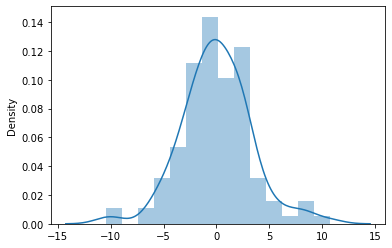

In [28]:
sns.distplot(error)

In [30]:
import scipy.stats as stats
stats.jarque_bera(error)

Jarque_beraResult(statistic=10.518130583861266, pvalue=0.005200163082170639)

H0: Errors are normally distributed
H1: Errors are not normally distributed
since the pval is less than 0.05 we reject H0 and conclude that residuals are not normally distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
y=df['Expected']
x=df.drop('Expected',axis=1)
x=pd.get_dummies(x,columns=['Status'],drop_first=True)
#Xc=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                   4.84e-108
Time:                        23:21:23   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Adult_Mortality      -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths        -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis             0.0305      0.058      0.523      0.602      -0.085       0.146
Measles              -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths      0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                 0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria            0.0388      0.073      0.535      0.593      -0.105       0.183
HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP               -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population        -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19    -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9       1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index         43.2384     11.241      3.846      0.000      20.956      65.520
Schooling             2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing     7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

In [3]:
lung=pd.read_csv('LungCapdata.csv')
lung.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                      Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
y=lung['FEV']
x=lung.drop('FEV',axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          9.10e-209
Time:                        23:37:35   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
y=lung['FEV']
x=lung.drop(['FEV','Smoke'],axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          9.05e-210
Time:                        23:38:08   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4486      0.223    -19.952      0.000      -4.886      -4.011
Age            0.0614      0.009      6.766      0.000       0.044       0.079
Height         0.1046      0.005     21.986      0.000       0.095       0.114
Gender         0.1611      0.033      4.864      0.000       0.096       0.226
==============================================================================
Omnibus:                       23.453   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.454
Skew:                           0.189   Prob(JB):                     4.96e-11
Kurtosis:                       4.264   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

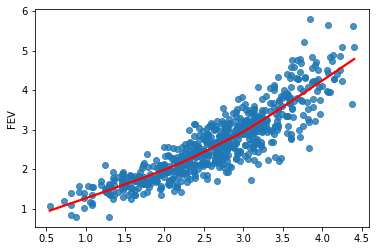

In [38]:
y_est=model.predict(Xc)
sns.regplot(x=y_est,y=y,lowess=True,line_kws={'color':'red'})
plt.show()

In [39]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.9850614019332685, 0.5540074783420279)

H0: fit of the model using central subset = fit of the model using full sample
H1: fit of model using full sample is worse compared to fit of model using central subset
sice probability 0.55 is higher than 0.05 we will accept the H0 to conclude that model is appropriate 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                     How can we rectify the multicollinearity 
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
x=lung.drop(['FEV'],axis=1)
Xc=sm.add_constant(x)# it is very important to add constant or else r2 will be bloated and we get wrong VIF values
vif=[VIF(Xc.values,i)for i in range(Xc.shape[1])]
pd.DataFrame(vif,index=Xc.columns,columns=['VIF'])

,VIF
const,191.122030
Age,3.019010
Height,2.829728
Gender,1.060228
Smoke,1.209564


- there is no multicolinearity detected in the dataset as all VIF values are below 9

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
y=lung['FEV']
x=lung.drop(['FEV'],axis=1)
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          9.10e-209
Time:                        23:48:39   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
sm.stats.stattools.durbin_watson(model.resid)

1.645201585591555

when there is no serial corelation b/w the residuals,the expected value of Durbin-Watson coff is 2,
since the model Durbin-Watson value is 1.64 there is a weak indication of serial corelation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                     Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
y=lung['FEV']
x=lung.drop(['FEV','Smoke'],axis=1)
Xc=sm.add_constant(x)
X_train, X_test, y_train, y_test=train_test_split(Xc,y,test_size=0.3,random_state=42)
model=sm.OLS(y,Xc).fit()
y_test_pred=model.predict(X_test)
print('MEAN SQUARED ERROR: ',mean_squared_error(y_test_pred,y_test))
print('ROOT MEAN SQUARED ERROR: ',np.sqrt(mean_squared_error(y_test_pred,y_test)))


MEAN SQUARED ERROR:  0.15331933872785553
ROOT MEAN SQUARED ERROR:  0.3915601342423096
